In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumer_key = '1PKoOhaOjVEm9Q1D*******'
consumer_secret = 'PxOOHEWBeGn8Wh7BSRzNXIY9uQfyqPAJdk*******'

access_token = '1128840976875839488-9EHVtaEVx7Le7hS4jp*******R'
access_token_secret = 'Q3JSXlJiBXAZPm4Vi18eAUK5j770pwbLaf*********'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [3]:
#Extract 100 tweets from a twitter user

posts = api.user_timeline(screen_name="NBA", count=100, lang = "en", tweet_mode="extended")

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i += 1

Show the 5 recent tweets: 

1)RT @WNBA: The semi-finals matchups are LOCKED IN 🔥

The #WNBAPlayoffs presented by @Google will be back in action on TUESDAY

Yall ready ⁉️…

2)RT @NBAHistory: Rookie Tim Duncan's interests: 🏀🕹️

#NBAMediaDay coverage starts Monday, 9/27 https://t.co/tTyCORzo6a

3)RT @WNBA: Continuing to make her mark 🌟

@Candace_Parker passes @LisaLeslie to become no.5 on the #WNBAPlayoffs All-Time Points Leaders Lis…

4)RT @WNBA: .@DianaTaurasi and @S10Bird exchange jerseys 🧡

#CountIt https://t.co/oq04x2YPjk

5)22 All-Star appearances.
7 @WNBA titles.

College teammates.
Lifelong friends.
Two basketball legends.

@S10Bird 🤝 @DianaTaurasi https://t.co/qA7xrkqnLG



In [59]:
#Obtain tweets by search for a key word

public_tweets = api.search('Peter Obi', count=1000, lang = "en", tweet_mode="extended")

print("Show the 5 recent tweets: \n")
j = 1
for tweet in public_tweets[0:5]:
    print(str(j) + ')' + tweet.full_text + '\n')
    j += 1

Show the 5 recent tweets: 

1)RT @guardian: UK Covid live: More than 1 million pupils in England out of school last week for pandemic-related reasons. https://t.co/0QAon…

2)RT @llenoa: Vinaka vakalevu 🇦🇺 for the ambulance support to our COVID prehospital operations

The 🚑🚑🚑 were registered today to @MOHFiji and…

3)RT @Phil_Kelly_: The United States is using Covid as a regime change weapon. I ask any of my followers with a sense of humanity to help Cub…

4)RT @WillBlackWriter: Two AIDS and COVID related tweets. One intelligent and one (thank you @cooltxchick) and one beyond stupid - by conserv…

5)RT @DanCrenshawTX: Imagine if 50 GOP state reps skipped work, drank beer on a private jet while ignoring federal mask mandates, held a pres…



In [6]:
#Create a dataframe with a column called tweets
#use first line for tweets from an account, uncomment second line (and comment first line) for tweets from search

df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])
#df = pd.DataFrame( [tweet.full_text for tweet in public_tweets], columns=['Tweets'])
df.tail()

,Tweets
95,"""When I get a cut, I think I'm top-5.""\n\nSoun..."
96,https://t.co/Pqxh2ExSNm - 10 key questions: Ca...
97,RT @WolvesLynxCR: To celebrate #HispanicHerita...
98,"“Today’s the day, I knew it!” 🤣\n\n@Giannis_An..."
99,"RT @NBAFoundation: ""We’re able to put them in ..."


In [7]:
#Clean the text using a function created below

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed mentions
    text = re.sub(r'#', '', text) #Removed hashtags
    text = re.sub(r'RT[\s]+', '', text) #Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlink
    text = re.sub(r':[\s]+', '', text) #Remove columns
    text = re.sub(r'\'[\s]+', '', text) #Remove apostrophe
    text = re.sub(r'\...+', '', text) #Remove dots
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(clean_text)

#show cleaned text
df

,Tweets
0,The semi-finals matchups are LOCKED IN 🔥\n\nTh...
1,Rookie Tim Duncan's interests🏀🕹️\n\nNBAMediaDa...
2,Continuing to make her mark 🌟\n\n_Parker passe...
3,\n\nCountIt
4,22 All-Star appearances.\n7 titles.\n\nColleg...
...,...
95,"""When I get a cut, I think I'm top-5.""\n\nSoun..."
96,- 10 key questionsCan Suns make return trip t...
97,To celebrate HispanicHeritageMonth &amp; ho...
98,"“Today’s the day, I knew it!” 🤣\n\n_An34 mic’d..."


In [8]:
#Creating a function to get the subjectivities and polarities

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity


In [9]:
#Create columns for them in the dataframe

df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

df

,Tweets,Subjectivity,Polarity
0,The semi-finals matchups are LOCKED IN 🔥\n\nTh...,0.200,0.100
1,Rookie Tim Duncan's interests🏀🕹️\n\nNBAMediaDa...,0.000,0.000
2,Continuing to make her mark 🌟\n\n_Parker passe...,0.000,0.000
3,\n\nCountIt,0.000,0.000
4,22 All-Star appearances.\n7 titles.\n\nColleg...,0.600,-0.100
...,...,...,...
95,"""When I get a cut, I think I'm top-5.""\n\nSoun...",0.350,0.700
96,- 10 key questionsCan Suns make return trip t...,0.700,0.000
97,To celebrate HispanicHeritageMonth &amp; ho...,0.000,0.000
98,"“Today’s the day, I knew it!” 🤣\n\n_An34 mic’d...",0.200,0.375


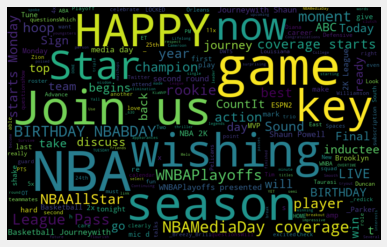

In [11]:
#See sentiment distribution, using wordcloud

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 800, height= 500, random_state=21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [12]:
#Create a function to compute negative, neutral and positive analysis

nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sid = SIA()
results = []

def get_sentiment(row, **kwargs):
    sentiment_score = sid.polarity_scores(row)
    positive_meter = round((sentiment_score['pos'] * 10), 2)
    negative_meter = round((sentiment_score['neg'] * 10), 2) 
    return positive_meter if kwargs['k'] == 'positive' else negative_meter

df['positive'] = df.Tweets.apply(get_sentiment, k='positive')
df['negative'] = df.Tweets.apply(get_sentiment, k='negative')
df['neutral'] = df.Tweets.apply(get_sentiment, k='neutral')
df['compound'] = df.Tweets.apply(get_sentiment, k='compound')

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emmanuel_bamidele/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Tweets,Subjectivity,Polarity,positive,negative,neutral,compound
0,The semi-finals matchups are LOCKED IN 🔥\n\nTh...,0.2,0.1,1.16,0.00,0.00,0.00
1,Rookie Tim Duncan's interests🏀🕹️\n\nNBAMediaDa...,0.0,0.0,0.00,0.00,0.00,0.00
2,Continuing to make her mark 🌟\n\n_Parker passe...,0.0,0.0,0.00,1.96,1.96,1.96
3,\n\nCountIt,0.0,0.0,0.00,0.00,0.00,0.00
4,22 All-Star appearances.\n7 titles.\n\nColleg...,0.6,-0.1,2.37,0.00,0.00,0.00


In [13]:
''''Analysis of polarity score to see negative and positive. 
Label returns positive (1) for score greater than 5 and negative for score less than 3'''


df['label'] = 0
df.loc[df['positive'] > 0.2, 'label'] = 1
df.loc[df['negative'] > 0.2, 'label'] = -1
df.head()

,Tweets,Subjectivity,Polarity,positive,negative,neutral,compound,label
0,The semi-finals matchups are LOCKED IN 🔥\n\nTh...,0.2,0.1,1.16,0.00,0.00,0.00,1
1,Rookie Tim Duncan's interests🏀🕹️\n\nNBAMediaDa...,0.0,0.0,0.00,0.00,0.00,0.00,0
2,Continuing to make her mark 🌟\n\n_Parker passe...,0.0,0.0,0.00,1.96,1.96,1.96,-1
3,\n\nCountIt,0.0,0.0,0.00,0.00,0.00,0.00,0
4,22 All-Star appearances.\n7 titles.\n\nColleg...,0.6,-0.1,2.37,0.00,0.00,0.00,1


In [14]:
#Save generated dataframe as csv 

name = str(input("Enter Input : " ))
df.to_csv(name + '.csv')

Enter Input : NBA-Tweets-26-9-2021


In [15]:
#Checking how many positives and negatives we have in the data
#The first line gives us raw value counts of the labels, 
#whereas the second line provides percentages with the normalize keyword.

print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 1    50
 0    41
-1     9
Name: label, dtype: int64
 1    50.0
 0    41.0
-1     9.0
Name: label, dtype: float64


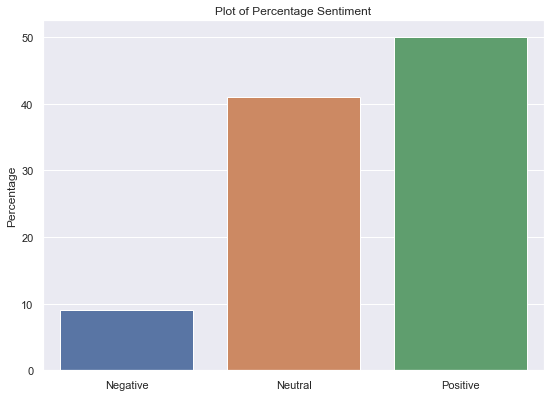

In [16]:
#Plotting a bar chart

sns.set(rc={'figure.figsize':(8,6)})

counts = df.label.value_counts(normalize=True) * 100

ax = sns.barplot(x=counts.index, y=counts)
ax.set(title="Plot of Percentage Sentiment");
ax.set_xticklabels(['Negative', 'Neutral', 'Positive']);
ax.set_ylabel("Percentage");

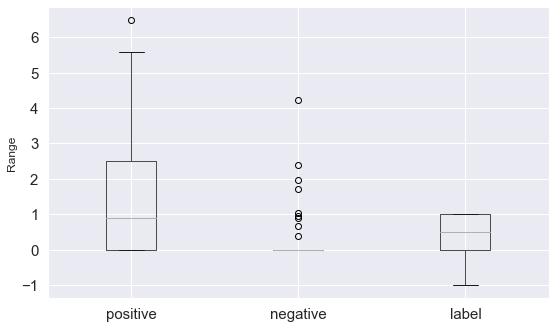

In [17]:
#boxplot to see average values of the labels and the postivity


boxplot = df.boxplot(column=['positive','negative', 'label'], 
                     fontsize = 15,grid = True, vert=True,figsize=(8,5,))
plt.ylabel('Range');

In [18]:
#get frequent words

#nltk.download()

stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df.Tweets
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)


In [19]:
from collections import Counter

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
nba,21
join,12
us,12
league,12
wnbaplayoffs,11
wishing,11
happy,11
key,10
nbamediaday,9


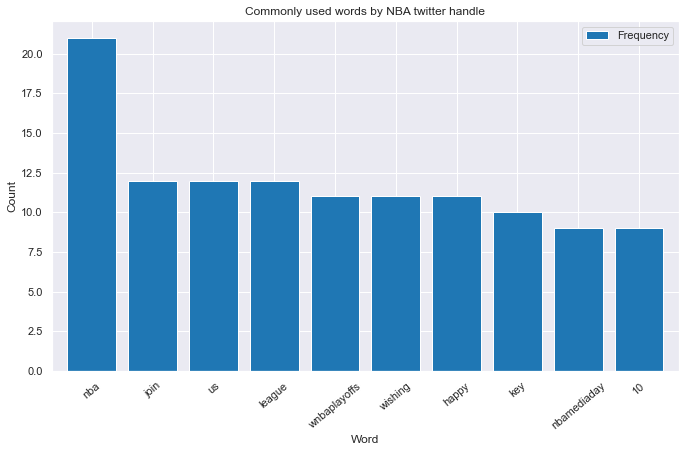

In [22]:
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART
rslt.plot.bar(rot=40, figsize=(10,6), width=0.8,colormap='tab10')
plt.title("Commonly used words by NBA twitter handle")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 8,6

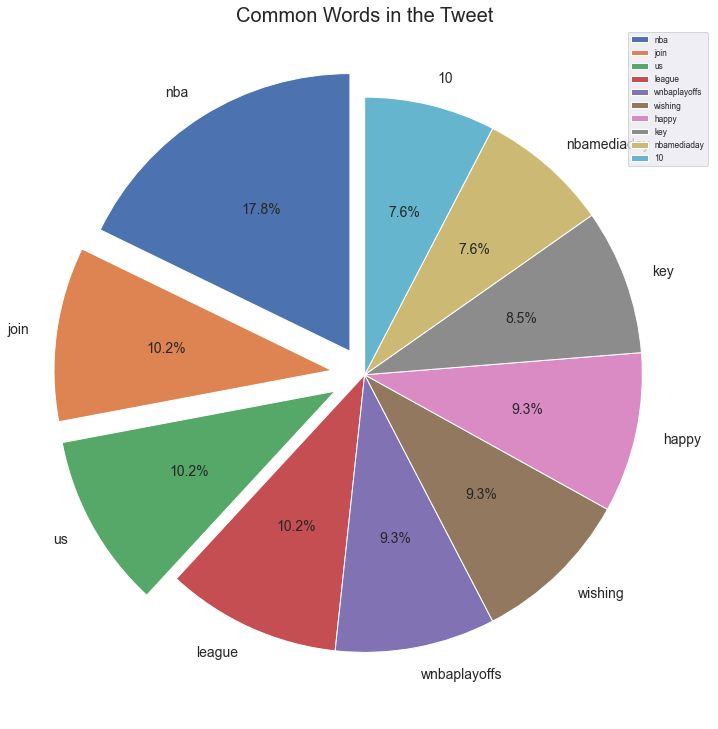

In [23]:
#PIE CHART

plt.figure(figsize=[10,10]);

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0)  # explode 1st slice
labels=['nba',
        'join',
        'us',
        'league',
        'wnbaplayoffs',
        'wishing',
        'happy',
        'key',
        'nbamediaday',
        '10']

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 14})
plt.legend( labels, loc='best',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title("Common Words in the Tweet", fontsize= 20)
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 15

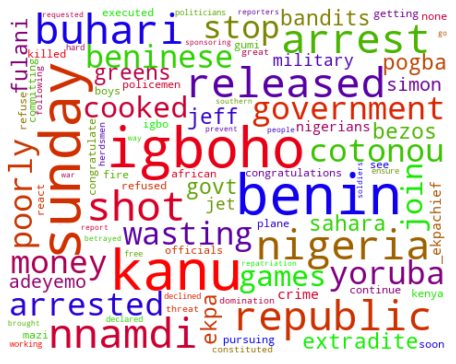

<Figure size 720x720 with 0 Axes>

In [73]:
#Wordcloud from generated words without stopwords

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']));
                      
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off");
plt.figure(figsize=[10,10]);
plt.show();